In [1]:
import numpy as np
import json
import torch


def embedding_similarity(emb1: torch.tensor, emb2: torch.tensor) -> float:
    """
    Calculate the cosine similarity between two embeddings
    :param emb1: torch.tensor
    :param emb2: torch.tensor
    :return: float
    """

    return (emb1 @ emb2.T) / (torch.norm(emb1) * torch.norm(emb2))

In [2]:
with open("data/train_final.jsonl") as f:
    lines = f.readlines()

data_mask_only = [json.loads(line) for line in lines]

n_sam_embs = [len(d["sam_embs"]) for d in data_mask_only]

# Load the embeddings
embeddings_mask_only = torch.cat(
    (
        torch.cat([torch.tensor(d["sam_embs"]) for d in data_mask_only]),
        torch.cat([torch.tensor(d["gt_embs"]) for d in data_mask_only]),
    )
).view(-1, 512)

print(len(data_mask_only[0]["sam_embs"]))

119


In [3]:
import matplotlib.pyplot as plt

mean = torch.mean(embeddings_mask_only, dim=0)

print(mean.shape)

torch.Size([512])


[119, 64, 36, 6, 51, 11, 59, 118, 39, 127]


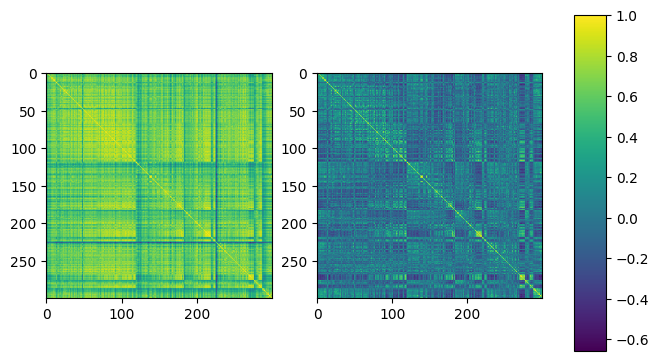

In [17]:
embeddings_mask_only_reg = (embeddings_mask_only - mean) / torch.norm(
    embeddings_mask_only - mean, dim=1
).view(-1, 1)

similarities_reg = torch.matmul(embeddings_mask_only_reg[:300], embeddings_mask_only_reg[:300].T)
similarities = torch.matmul(embeddings_mask_only[:300], embeddings_mask_only[:300].T)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(similarities)
ax[1].imshow(similarities_reg)

cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])

fig.colorbar(ax[1].imshow(similarities_reg), cax=cbar_ax)

print(n_sam_embs[:10])

In [18]:
# apply layer normalization on first mask [0]
embeddings_mask_only_reg[0] = (
    embeddings_mask_only_reg[0] - torch.mean(embeddings_mask_only_reg[0])
) / torch.norm(embeddings_mask_only_reg[0])

embeddings_mask_only_reg[0]


tensor([-1.0417e-01, -5.0997e-02, -3.5786e-02,  2.8987e-02,  3.7020e-02,
        -4.9879e-03, -3.1975e-02,  1.2480e-01,  2.6168e-02,  1.0591e-02,
        -3.0596e-02,  3.9612e-02,  1.2799e-02, -2.4519e-02,  4.4826e-03,
        -1.1474e-02,  3.8362e-02, -2.8793e-03, -1.1127e-02,  2.8848e-02,
        -6.1752e-02,  7.4344e-02, -7.6277e-02, -2.7279e-02, -4.3456e-02,
         5.5654e-03,  1.6251e-02, -2.1103e-02,  7.4306e-03,  1.5283e-02,
         1.5794e-02,  8.1607e-03,  2.2437e-02, -3.3426e-02,  6.3353e-03,
         3.6543e-02,  2.8722e-02,  3.9185e-02, -7.5779e-02,  4.1419e-02,
         4.3844e-02,  2.8535e-02,  5.8761e-03, -1.3552e-03,  8.6806e-03,
         2.4691e-02,  2.6712e-02, -3.6152e-02,  6.5575e-02,  2.5100e-02,
         9.9992e-02, -1.0033e-02, -2.7669e-02,  3.4944e-02, -2.6262e-02,
         5.7333e-02,  1.9465e-02, -1.3784e-02, -6.4395e-03, -4.5825e-03,
        -1.1440e-01,  1.5127e-02, -1.4954e-02,  1.0449e-02, -7.8027e-03,
         7.1384e-02,  1.0791e-01,  6.2259e-03,  5.4

In [19]:
from PIL import Image
import os

path = os.path.join("../../datasets/ReasonSeg/train", os.path.basename(data_mask_only[0]["img"]))
print(path)
img = Image.open(path)

../../datasets/ReasonSeg/train/6485443609_3e1f04dc87_o.jpg


In [20]:
img.save("test.png")

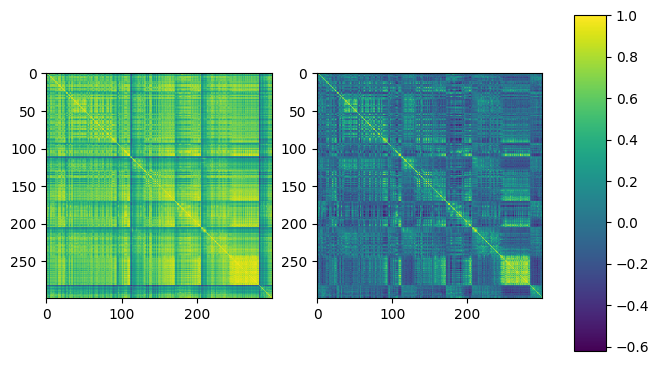

In [21]:
with open("data/val_final.jsonl") as f:
    lines = f.readlines()

val_mask_only = [json.loads(line) for line in lines]

embeddings_val_mask_only = torch.cat(
    (
        torch.cat([torch.tensor(d["sam_embs"]) for d in val_mask_only]),
        torch.cat([torch.tensor(d["gt_embs"]) for d in val_mask_only]),
    )
).view(-1, 512)

embeddings_val_mask_only_reg = (embeddings_val_mask_only - mean) / torch.norm(
    embeddings_val_mask_only - mean, dim=1
).view(-1, 1)

val_similarities_reg = torch.matmul(
    embeddings_val_mask_only_reg[:300], embeddings_val_mask_only_reg[:300].T
)
val_similarities = torch.matmul(embeddings_val_mask_only[:300], embeddings_val_mask_only[:300].T)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(val_similarities)
ax[1].imshow(val_similarities_reg)

cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])

fig.colorbar(ax[1].imshow(val_similarities_reg), cax=cbar_ax)

In [19]:
val_similarities_reg[0]

tensor([1.0000, 0.2907, 0.2397,  ..., 0.0538, 0.2890, 0.1888])

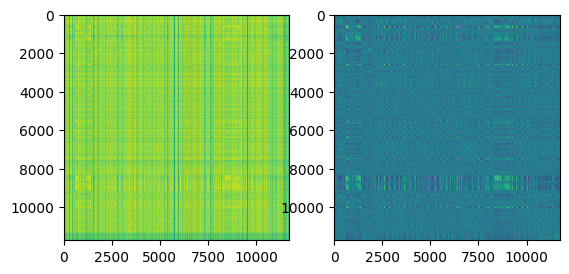

In [20]:
with open("data/test_final.jsonl") as f:
    lines = f.readlines()

test_mask_only = [json.loads(line) for line in lines]

embeddings_test_mask_only = torch.cat(
    (
        torch.cat([torch.tensor(d["sam_embs"]) for d in test_mask_only]),
        torch.cat([torch.tensor(d["gt_embs"]) for d in test_mask_only]),
    )
).view(-1, 512)

embeddings_test_mask_only_reg = (embeddings_test_mask_only - mean) / torch.norm(
    embeddings_test_mask_only - mean, dim=1
).view(-1, 1)

test_similarities_reg = torch.matmul(embeddings_test_mask_only_reg, embeddings_test_mask_only_reg.T)
test_similarities = torch.matmul(embeddings_test_mask_only, embeddings_test_mask_only.T)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(test_similarities)
ax[1].imshow(test_similarities_reg)

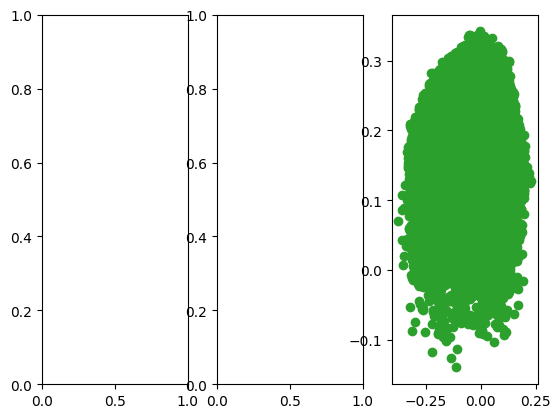

In [ ]:
# show pca of the embeddings
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings_mask_only)
pca_embeddings = pca.transform(embeddings_mask_only)
val_pca_embeddings = pca.transform(embeddings_val_mask_only)
test_pca_embeddings = pca.transform(embeddings_test_mask_only)

fig, ax = plt.subplots(3, 1)
ax[0] = plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
ax[1] = plt.scatter(val_pca_embeddings[:, 0], val_pca_embeddings[:, 1])
ax[2] = plt.scatter(test_pca_embeddings[:, 0], test_pca_embeddings[:, 1])

plt.show()

In [ ]:
# show pca of the embeddings
from sklearn.decomposition import TSNE

tsne = TSNE(n_components=2)


fig, ax = plt.subplots(1, 3)
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
plt.scatter(val_pca_embeddings[:, 0], val_pca_embeddings[:, 1])
plt.scatter(test_pca_embeddings[:, 0], test_pca_embeddings[:, 1])

In [22]:
# torch.save(mean, "models/train_embs_mean.pt") # we probably want to push this to the repo

In [23]:
from preprocessing.alphaclip import AlphaCLIPEncoder
from PIL import Image
from configuration import load_yaml_config

encoder = AlphaCLIPEncoder(load_yaml_config("config.yaml").alphaclip)

black_image = Image.fromarray(np.zeros((256, 256, 3), dtype=np.uint8))
black_mask = np.zeros((256, 256), dtype=np.uint8)

black_emb = encoder.get_visual_embedding(black_image, black_mask, mask_only=True).to(device="cuda")


Model has already been downloaded.


/home/mranzetti/dev/LISA_ACV/.venv/lib/python3.12/site-packages/alpha_clip/alpha_clip.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.visual.load_state_dict(torc

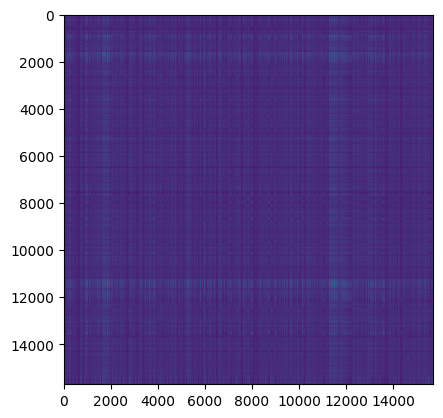

In [24]:
with open("data/val-mask-only.jsonl") as f:
    lines = f.readlines()

black_emb = black_emb.to("cpu")
val_mask_only = [json.loads(line) for line in lines]

embeddings_val_mask_only = torch.cat(
    (
        torch.cat([torch.tensor(d["sam_embs"]) for d in val_mask_only]),
        torch.cat([torch.tensor(d["gt_embs"]) for d in val_mask_only]),
    )
)

embeddings_val_mask_only = (embeddings_val_mask_only - black_emb) / torch.norm(
    embeddings_val_mask_only - black_emb
)

similarities = torch.matmul(embeddings_val_mask_only, embeddings_val_mask_only.T)


plt.imshow(similarities)

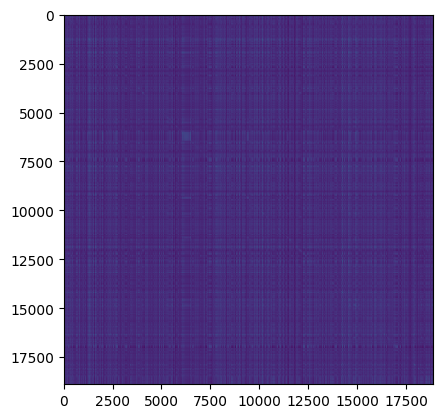

In [25]:
with open("data/train-mask-only.jsonl") as f:
    lines = f.readlines()

data_mask_only = [json.loads(line) for line in lines]

# Load the embeddings
embeddings_mask_only = torch.cat(
    (
        torch.cat([torch.tensor(d["sam_embs"]) for d in data_mask_only]),
        torch.cat([torch.tensor(d["gt_embs"]) for d in data_mask_only]),
    )
)

embeddings_mask_only = (embeddings_mask_only - black_emb) / torch.norm(
    embeddings_mask_only - black_emb
)

similarities = torch.matmul(embeddings_mask_only, embeddings_mask_only.T)

plt.imshow(similarities)